In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("../data/processed/penetration_times.csv", index_col=0)

In [3]:
df

,times,errors,times penetration,errors penetration,size,category
0,0.039489,0.144045,0.573708,0.087204,37.8720,normal
1,0.039600,0.257683,0.574612,0.125898,28.9490,normal
2,0.115016,0.251403,0.929614,0.276270,93.2620,normal
3,0.429852,0.330621,1.476072,0.243217,175.9280,normal
4,0.121153,0.187555,0.687578,0.170029,20.9550,normal
5,0.225721,0.126515,0.827970,0.112678,101.6085,normal
6,0.077847,0.112165,0.316383,0.056425,38.1945,normal
7,0.212907,0.155599,1.004060,0.199216,108.8545,normal
8,0.038185,0.283179,0.452838,0.098675,26.5075,normal
9,0.077847,0.112165,0.316383,0.056425,38.1945,normal


In [4]:
x = df["size"].to_numpy()
y = df["times penetration"].to_numpy()

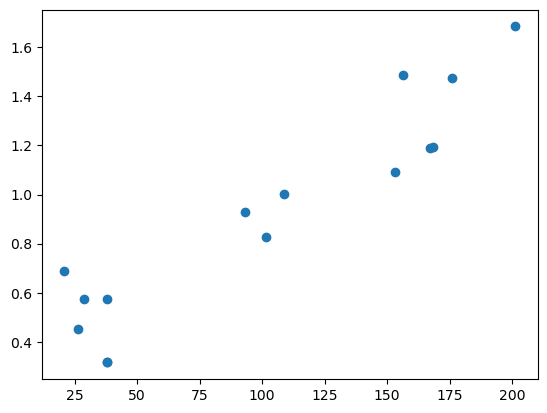

In [6]:
plt.scatter(x, y)

In [68]:
degrees = [
    (0, 1),
    (1,),
    (2,),
    (0, 2),
    (0, 1, 2),
]

In [69]:
fits = [np.polynomial.polynomial.polyfit(x, y, deg=deg, full=True) for deg in degrees]
models = [np.polynomial.polynomial.Polynomial(fit[0]) for fit in fits]

In [70]:
fits

[(array([0.28926284, 0.0062423 ]),
  [array([0.32837303]),
   np.int32(2),
   array([1.35969781, 0.38887254]),
   np.float64(3.3306690738754696e-15)]),
 (array([0.        , 0.00830352]),
  [array([0.679267]),
   np.int32(1),
   array([1.]),
   np.float64(3.3306690738754696e-15)]),
 (array([0.00000000e+00, 0.00000000e+00, 4.84632677e-05]),
  [array([2.05943795]),
   np.int32(1),
   array([1.]),
   np.float64(3.3306690738754696e-15)]),
 (array([4.98946298e-01, 0.00000000e+00, 2.97023504e-05]),
  [array([0.31740398]),
   np.int32(2),
   array([1.31544911, 0.51922408]),
   np.float64(3.3306690738754696e-15)]),
 (array([4.02371297e-01, 2.75882019e-03, 1.68504128e-05]),
  [array([0.30067043]),
   np.int32(3),
   array([1.64507313, 0.53622876, 0.07869627]),
   np.float64(3.3306690738754696e-15)])]

Text(0.5, 0, 'Biofilm size (µm)')

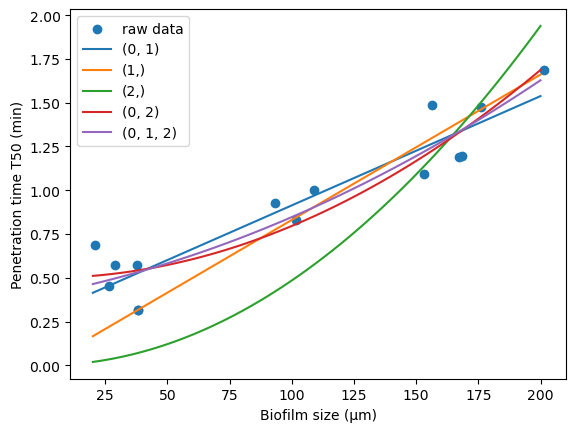

In [76]:
polyline = np.linspace(20, 200, 100)
plt.scatter(x, y, label="raw data")
for model, deg in zip(models, degrees):
    plt.plot(polyline, model(polyline), label=str(deg))

plt.legend()
plt.ylabel("Penetration time T50 (min)")
plt.xlabel("Biofilm size (µm)")

In [74]:
for model, deg in zip(models, degrees):
    print(deg)
    print("R_squared", r2_score(y, model(x)))

(0, 1)
R_squared 0.8759398276379358
(1,)
R_squared 0.7433711850691047
(2,)
R_squared 0.2219390647257652
(0, 2)
R_squared 0.880083961934043
(0, 1, 2)
R_squared 0.8864059393518127
